In [1]:
# Import qiskit
from qiskit import *
# Import libraries
from random import random
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [2]:
## SETUP
# Protocol uses 3 qubits and 1 classical bit in a register
qr = QuantumRegister(3, name="q")    # Protocol uses 3 qubits
cr = ClassicalRegister(1, name="cr") # and 1 classical bit
bit_flip_circuit = QuantumCircuit(qr, cr)

In [3]:
def encoding(qc, q0, q1, q2):
    """Creates encoding process using qubits q0 & q1 & q2"""
    qc.cx(q0,q1) # CNOT with q1 as control and q0 as target
    qc.cx(q0,q2) # CNOT with q2 as control and q0 as target

In [4]:
def error_simulation(qc, q0, q1, q2, probability):
    """Creates error simulation using qubits q0 & q1 & q2"""
    x0 = random() # apply a x gate on q0
    x1 = random() # apply a x gate on q1
    x2 = random() # apply a x gate on q2
    if x0 < probability: # apply a x gate on q0 if x0 < probability
        qc.x(q0)
    if x1 < probability: # apply a x gate on q1 if x1 < probability
        qc.x(q1)
    if x2 < probability: # apply a x gate on q2 if x2 < probability
        qc.x(q2) 

In [5]:
def measure(qc, q0):
    """Measures qubit q0 """
    qc.barrier()
    qc.measure(q0,0)

In [6]:
def decoding(qc, q0, q1, q2):
    """Creates encoding process using qubits q0 & q1 & q2"""
    qc.cx(q0,q1) # CNOT with q1 as control and q0 as target
    qc.cx(q0,q2) # CNOT with q2 as control and q0 as target
    bit_flip_circuit.ccx(q2,q1,q0)

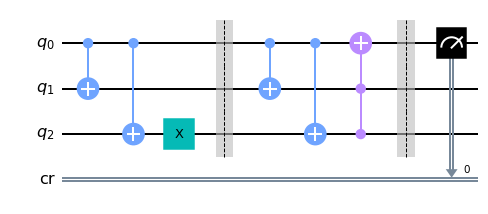

In [7]:
# Let's apply the process above to our circuit:

# step 1. encoding
encoding(bit_flip_circuit, 0, 1, 2)

# step 2. error simulation
error_simulation(bit_flip_circuit, 0, 1, 2, 0.3)
bit_flip_circuit.barrier()

# step 3. decoding
decoding(bit_flip_circuit, 0, 1, 2)

#Measurement
measure(bit_flip_circuit, 0)

# View the circuit:
%matplotlib inline
bit_flip_circuit.draw(output='mpl')

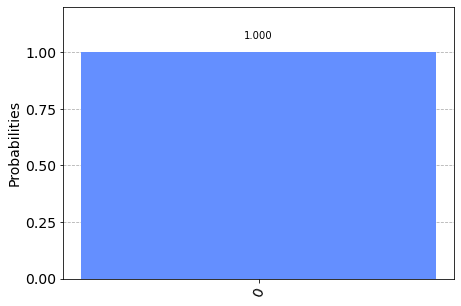

In [8]:
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(bit_flip_circuit, backend, shots=1024).result().get_counts() # No. of measurement shots = 1024
plot_histogram(counts)